In [1]:
%matplotlib inline
import pandas as pd
import glob
import os
import matplotlib.pyplot as plt
import numpy as np
import keras
import random
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Dense, Flatten, Activation, Dropout, Attention, BatchNormalization
from tensorflow.keras import optimizers, Input
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras import layers
from keras.models import Model, load_model
from tensorflow.keras.optimizers import SGD
import pprint
from datetime import datetime
import matplotlib
import tensorflow as tf
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.model_selection import KFold
from sklearn import preprocessing
from sklearn.metrics import r2_score

# import sklearn
import math
from numpy.random import seed

from sklearn.model_selection import KFold, RandomizedSearchCV
from sklearn.metrics import mean_absolute_error, mean_squared_error
from scikeras.wrappers import KerasRegressor



seed_value = 10
random.seed(seed_value)
np.random.seed(seed_value)
tf.random.set_seed(seed_value)
print('pd.__version__: ',pd.__version__)
print('np.__version__: ',np.__version__)
print('keras.__version__: ',keras.__version__)
print('tf.__version__: ',tf.__version__)
print('matplotlib.__version__: ',matplotlib.__version__)

C:\Users\msalmaniaran\AppData\Local\anaconda3\envs\RL_Test\lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


pd.__version__:  2.2.3
np.__version__:  1.26.4
keras.__version__:  3.7.0
tf.__version__:  2.18.0
matplotlib.__version__:  3.9.2


In [153]:
import os

# Define the directory you want to list
directory = 'C:/Backup - Oct 2024/Oct-2023 Backup/Users/msalmaniaran/PhD/Results-data/Reconfigurable-patch - Copy'

# List all files and directories in the specified directory
all_files = os.listdir(directory)

# Filter out only the files
files = [f for f in all_files if os.path.isfile(os.path.join(directory, f))]
files.sort()
# Print the list of files
for file in files:
    print(file)

dict_files = {i: files[i] for i in range(len(files))}
print(dict_files)

AllDiode-OFF-Alpha sweep.csv
AllDiode-OFF-fx sweep.csv
AllDiode-OFF-fy sweep.csv
AllDiode-OFF-l sweep.csv
AllDiode-OFF-lextention sweep.csv
AllDiode-OFF-lh sweep.csv
AllDiode-OFF-lr sweep.csv
AllDiode-OFF-lv sweep.csv
AllDiode-OFF-offset1 sweep.csv
AllDiode-OFF-pr sweep.csv
AllDiode-OFF-pr2 sweep.csv
AllDiode-OFF-w sweep.csv
AllDiode-OFF-wr sweep.csv
AllDiode-OFF-wu sweep.csv
AllDiode-ON-Alpha sweep.csv
AllDiode-ON-fx sweep.csv
AllDiode-ON-fy sweep.csv
AllDiode-ON-l sweep.csv
AllDiode-ON-lextention sweep.csv
AllDiode-ON-lh sweep.csv
AllDiode-ON-lr sweep.csv
AllDiode-ON-lv sweep.csv
AllDiode-ON-offset1 sweep.csv
AllDiode-ON-pr sweep.csv
AllDiode-ON-pr2 sweep.csv
AllDiode-ON-w sweep.csv
AllDiode-ON-wr sweep.csv
AllDiode-ON-wu sweep.csv
lowerDiode-ON-Alpha sweep.csv
lowerDiode-ON-fx sweep.csv
lowerDiode-ON-fy sweep.csv
lowerDiode-ON-l sweep.csv
lowerDiode-ON-lextention sweep.csv
lowerDiode-ON-lh sweep.csv
lowerDiode-ON-lr sweep.csv
lowerDiode-ON-lv sweep.csv
lowerDiode-ON-offset1 sweep.cs

In [154]:
num_dfs = 14
n = 3
df = pd.DataFrame()
for i in range(num_dfs*(n-1), n*num_dfs):
    # Creating a sample DataFrame with random data
    df_new = pd.read_csv("C:/Backup - Oct 2024/Oct-2023 Backup/Users/msalmaniaran/PhD/Results-data/Reconfigurable-patch - Copy/"+str(dict_files[i])) 
    df = pd.concat([df, df_new], ignore_index=True)

# for i in range(4*num_dfs):
#     # Creating a sample DataFrame with random data
#     df_new = pd.read_csv("D:/Oct-2023 Backup/Users/msalmaniaran/PhD/Results-data/Reconfigurable-patch/"+str(dict_files[i])) 
#     df = pd.concat([df, df_new], ignore_index=True)

In [155]:
# print(df)
a =len(df)
b= a/250
print(int(b))

642


In [156]:
# files = {}
# # num_dfs = len(files)
# num_dfs = 56

# for i in range(num_dfs):
#     # Creating a sample DataFrame with random data
#     df = pd.read_csv("D:/Oct-2023 Backup/Users/msalmaniaran/PhD/Results-data/Reconfigurable-patch/"+str(dict_files[i])) 
#     files[f'file{i}'] = df
#     # Identify NaN values using np.isnan
#     nan_indices = np.isnan(df)
#     #print(nan_indices)
#     # Use boolean indexing to drop NaN values
#     data_no_nan = df[~nan_indices.any(axis=1)]

# # Accessing the DataFrames
# for key, dataframe in files.items():
#     # Identify NaN values using np.isnan
#     nan_indices = np.isnan(dataframe)
#     #print(nan_indices)
#     # Use boolean indexing to drop NaN values
#     data_no_nan = dataframe[~nan_indices.any(axis=1)]
    
#     print(f'{key}:\n{dataframe}\n')

In [157]:
# def find_changes_in_column(df, column_name):
#     # Ensure the column exists in the DataFrame
#     if column_name not in df.columns:
#         return f"Column '{column_name}' does not exist in the DataFrame."
    
#     # Compare each value with the previous one in the column
#     change_locs = df[column_name].ne(df[column_name].shift())
#     change_indices = change_locs[change_locs].index.tolist()
    
#     return change_indices

# # Specify the column to search for changes
# column_to_search = 'alpha [mm]'

# # Find changes in the specified column
# changes_in_column = find_changes_in_column(files['file0'], column_to_search)
# print(f"Changes in column '{column_to_search}': {changes_in_column}")

In [158]:
# i = 0
# a = changes_in_column[i]
# b = changes_in_column[i+1]
# selected_rows = files['file0'][a:b]  # Note: the end index is exclusive
# print(selected_rows)

# Frequency Window

In [159]:
df_ys = df.drop(['alpha [mm]','fx [mm]', 'fy [mm]', 'l [mm]', 'lextension1 [mm]', 'lh [mm]', 'lr [mm]', 'lv [mm]', 'offset1 [mm]', 'pr [mm]', 'pr2 [mm]', 'w [mm]', 'wr [mm]', 'wu [mm]', 'Diode 1 state', 'Diode 2 state', 'Freq [GHz]'],axis=1)
ys_data = df_ys.values
df_yf = df.drop(['alpha [mm]','fx [mm]', 'fy [mm]', 'l [mm]', 'lextension1 [mm]', 'lh [mm]', 'lr [mm]', 'lv [mm]', 'offset1 [mm]', 'pr [mm]', 'pr2 [mm]', 'w [mm]', 'wr [mm]', 'wu [mm]', 'Diode 1 state', 'Diode 2 state', 'dB(S(1,1)) []'],axis=1)
yf_data = df_yf.values
df_y = df.drop(['alpha [mm]','fx [mm]', 'fy [mm]', 'l [mm]', 'lextension1 [mm]', 'lh [mm]', 'lr [mm]', 'lv [mm]', 'offset1 [mm]', 'pr [mm]', 'pr2 [mm]', 'w [mm]', 'wr [mm]', 'wu [mm]', 'Diode 1 state', 'Diode 2 state'],axis=1)
array = df_ys.values

a = len(df)
b = int(a/250)
reshaped_array = array.reshape(b, 250)   #250 is the number of sample points within 1-4 GHz.
df_yst = pd.DataFrame(reshaped_array)


# crob the frequency as needed
df_yst = df_yst.iloc[:, 40:-80] 
freq = df_yf.iloc[40:170].values
freq = np.squeeze(freq).tolist()


df_yst = df_yst.reset_index(drop=True)
# # Identify NaN values using np.isnan
# nan_indices = np.isnan(df_yst)
# #print(nan_indices)
# # Use boolean indexing to drop NaN values
# data_no_nan = df_yst[~nan_indices.any(axis=1)]

y_data = df_yst.values
print(df_yst)

          40        41        42        43        44        45        46   \
0   -0.154909 -0.156450 -0.158143 -0.159996 -0.162012 -0.164201 -0.166569   
1   -0.151750 -0.153194 -0.154834 -0.156675 -0.158723 -0.160985 -0.163468   
2   -0.157994 -0.159864 -0.161875 -0.164035 -0.166350 -0.168829 -0.171481   
3   -0.157905 -0.159860 -0.161979 -0.164269 -0.166738 -0.169393 -0.172244   
4   -0.158530 -0.160560 -0.162770 -0.165165 -0.167756 -0.170551 -0.173560   
..        ...       ...       ...       ...       ...       ...       ...   
637 -0.290470 -0.306876 -0.325070 -0.345293 -0.367821 -0.392984 -0.421164   
638 -0.281655 -0.297476 -0.315030 -0.334552 -0.356316 -0.380643 -0.407912   
639 -0.281384 -0.296369 -0.312833 -0.330982 -0.351060 -0.373350 -0.398190   
640 -0.288509 -0.305344 -0.323947 -0.344518 -0.367283 -0.392502 -0.420474   
641 -0.303439 -0.321540 -0.341928 -0.365075 -0.391639 -0.422609 -0.459578   

          47        48        49   ...       160       161       162  \
0  

In [160]:
df_x = df.drop(['Freq [GHz]', 'dB(S(1,1)) []', 'Diode 2 state', 'Diode 1 state' ,'alpha [mm]'], axis=1)
df_x_selected = df_x.iloc[::250].reset_index(drop=True)

df_concat = pd.concat([df_x_selected, df_yst], axis=1)
# # Identify NaN values using np.isnan
# nan_indices = np.isnan(df_selected)
# # print(nan_indices)
# # Use boolean indexing to drop NaN values
# data_no_nan = df_selected[~nan_indices.any(axis=1)]

df_filtered = df_concat.dropna()


print(df_x_selected.head())

   fx [mm]  fy [mm]   l [mm]  lextension1 [mm]  lh [mm]  lr [mm]  lv [mm]  \
0  18.3360   7.4080  47.6640           21.2000  41.5360  2.20000  21.0880   
1  18.4506   7.4543  47.9619           21.3325  41.7956  2.21375  21.2198   
2  18.5652   7.5006  48.2598           21.4650  42.0552  2.22750  21.3516   
3  18.6798   7.5469  48.5577           21.5975  42.3148  2.24125  21.4834   
4  18.7944   7.5932  48.8556           21.7300  42.5744  2.25500  21.6152   

   offset1 [mm]  pr [mm]  pr2 [mm]  w [mm]  wr [mm]  wu [mm]  
0         28.80    997.2   19.8720  56.160  4.95200   4.7040  
1         28.98   1247.2   19.9962  56.511  4.98295   4.7334  
2         29.16   1497.2   20.1204  56.862  5.01390   4.7628  
3         29.34   1747.2   20.2446  57.213  5.04485   4.7922  
4         29.52   1997.2   20.3688  57.564  5.07580   4.8216  


In [161]:
# Define the threshold
threshold = 0

# Specify the column range to check
start_col = int(df_yst.columns[0])
end_col = len(df_yst.columns)-1

# Select the column names based on the range
columns_to_check = [i for i in range(start_col, end_col + 1)]

# Drop rows where any value in specified columns exceeds the threshold
df_all = df_filtered[df_filtered[columns_to_check].le(threshold).all(axis=1)]

df_all = df_all.reset_index(drop=True)
print(df_all)

     fx [mm]  fy [mm]   l [mm]  lextension1 [mm]  lh [mm]  lr [mm]  lv [mm]  \
0    18.3360   7.4080  47.6640           21.2000  41.5360  2.20000  21.0880   
1    18.4506   7.4543  47.9619           21.3325  41.7956  2.21375  21.2198   
2    18.5652   7.5006  48.2598           21.4650  42.0552  2.22750  21.3516   
3    18.6798   7.5469  48.5577           21.5975  42.3148  2.24125  21.4834   
4    18.7944   7.5932  48.8556           21.7300  42.5744  2.25500  21.6152   
..       ...      ...      ...               ...      ...      ...      ...   
635  22.5300   9.1000  58.5600           26.0400  51.0300  2.70000  25.9100   
636  22.5300   9.1000  58.5600           26.0400  51.0300  2.70000  25.9100   
637  22.5300   9.1000  58.5600           26.0400  51.0300  2.70000  25.9100   
638  22.5300   9.1000  58.5600           26.0400  51.0300  2.70000  25.9100   
639  22.5300   9.1000  58.5600           26.0400  51.0300  2.70000  25.9100   

     offset1 [mm]  pr [mm]  pr2 [mm]  ...       160

In [162]:
# df_all2 = df_all

In [163]:
# df_all2.iloc[153,:]

In [164]:
# # # Drop the row with index 2
# df_all = df_all.drop(153)

# # # Reset the index if needed (optional)
# df_all = df_all.reset_index(drop=True)

In [165]:
# # # Drop the row with index 2
# df_all = df_all.drop(369)

# # # Reset the index if needed (optional)
# df_all = df_all.reset_index(drop=True)

In [166]:
# threshold = -10
# df_all = df_all.loc[~(df_all[df_all.columns[16:]] > threshold).all(axis=1)]
# df_all = df_all.reset_index(drop=True)

In [167]:
df_all

,fx [mm],fy [mm],l [mm],lextension1 [mm],lh [mm],lr [mm],lv [mm],offset1 [mm],pr [mm],pr2 [mm],...,160,161,162,163,164,165,166,167,168,169
0,18.3360,7.4080,47.6640,21.2000,41.5360,2.20000,21.0880,28.80,997.2,19.8720,...,-0.598519,-0.622495,-0.658164,-0.709937,-0.784413,-0.891633,-1.047068,-1.274617,-1.610305,-2.103570
1,18.4506,7.4543,47.9619,21.3325,41.7956,2.21375,21.2198,28.98,1247.2,19.9962,...,-0.672182,-0.722554,-0.793850,-0.895044,-1.039999,-1.250317,-1.559327,-2.015388,-2.674623,-3.548566
2,18.5652,7.5006,48.2598,21.4650,42.0552,2.22750,21.3516,29.16,1497.2,20.1204,...,-0.911781,-1.057005,-1.268140,-1.578307,-2.033943,-2.682970,-3.512197,-4.293484,-4.554991,-4.129378
3,18.6798,7.5469,48.5577,21.5975,42.3148,2.24125,21.4834,29.34,1747.2,20.2446,...,-0.750783,-0.841895,-0.971313,-1.157481,-1.428826,-1.827205,-2.404884,-3.190836,-4.074083,-4.650573
4,18.7944,7.5932,48.8556,21.7300,42.5744,2.25500,21.6152,29.52,1997.2,20.3688,...,-1.309818,-1.656393,-2.170461,-2.907314,-3.839931,-4.661827,-4.813798,-4.228067,-3.412506,-2.706851
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
635,22.5300,9.1000,58.5600,26.0400,51.0300,2.70000,25.9100,35.38,-2.8,24.4100,...,-2.785478,-3.460203,-4.332792,-5.343748,-6.195278,-6.387555,-5.848724,-5.100800,-4.579860,-4.449046
636,22.5300,9.1000,58.5600,26.0400,51.0300,2.70000,25.9100,35.38,-2.8,24.4100,...,-2.310414,-2.804466,-3.471731,-4.384193,-5.635488,-7.310596,-9.323400,-10.931529,-10.895998,-9.700793
637,22.5300,9.1000,58.5600,26.0400,51.0300,2.70000,25.9100,35.38,-2.8,24.4100,...,-1.637320,-1.905554,-2.252394,-2.707791,-3.314843,-4.134443,-5.247055,-6.736420,-8.598893,-10.446229
638,22.5300,9.1000,58.5600,26.0400,51.0300,2.70000,25.9100,35.38,-2.8,24.4100,...,-1.296681,-1.467105,-1.677362,-1.939507,-2.269909,-2.690652,-3.230763,-3.925648,-4.810262,-5.897212


# Post-Processing (if needed for removing out range data)

In [207]:
df_all.reset_index(drop=True, inplace=True)
df_all.drop(index_lowR2, inplace=True)
df_all.reset_index(drop=True, inplace=True)

In [208]:
df_all

,fx [mm],fy [mm],l [mm],lextension1 [mm],lh [mm],lr [mm],lv [mm],offset1 [mm],pr [mm],pr2 [mm],...,160,161,162,163,164,165,166,167,168,169
0,18.3360,7.4080,47.6640,21.2000,41.5360,2.20000,21.0880,28.80,997.2,19.8720,...,-0.598519,-0.622495,-0.658164,-0.709937,-0.784413,-0.891633,-1.047068,-1.274617,-1.610305,-2.103570
1,18.4506,7.4543,47.9619,21.3325,41.7956,2.21375,21.2198,28.98,1247.2,19.9962,...,-0.672182,-0.722554,-0.793850,-0.895044,-1.039999,-1.250317,-1.559327,-2.015388,-2.674623,-3.548566
2,18.5652,7.5006,48.2598,21.4650,42.0552,2.22750,21.3516,29.16,1497.2,20.1204,...,-0.911781,-1.057005,-1.268140,-1.578307,-2.033943,-2.682970,-3.512197,-4.293484,-4.554991,-4.129378
3,18.6798,7.5469,48.5577,21.5975,42.3148,2.24125,21.4834,29.34,1747.2,20.2446,...,-0.750783,-0.841895,-0.971313,-1.157481,-1.428826,-1.827205,-2.404884,-3.190836,-4.074083,-4.650573
4,18.7944,7.5932,48.8556,21.7300,42.5744,2.25500,21.6152,29.52,1997.2,20.3688,...,-1.309818,-1.656393,-2.170461,-2.907314,-3.839931,-4.661827,-4.813798,-4.228067,-3.412506,-2.706851
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
576,22.5300,9.1000,58.5600,26.0400,51.0300,2.70000,25.9100,35.38,-2.8,24.4100,...,-2.785478,-3.460203,-4.332792,-5.343748,-6.195278,-6.387555,-5.848724,-5.100800,-4.579860,-4.449046
577,22.5300,9.1000,58.5600,26.0400,51.0300,2.70000,25.9100,35.38,-2.8,24.4100,...,-2.310414,-2.804466,-3.471731,-4.384193,-5.635488,-7.310596,-9.323400,-10.931529,-10.895998,-9.700793
578,22.5300,9.1000,58.5600,26.0400,51.0300,2.70000,25.9100,35.38,-2.8,24.4100,...,-1.637320,-1.905554,-2.252394,-2.707791,-3.314843,-4.134443,-5.247055,-6.736420,-8.598893,-10.446229
579,22.5300,9.1000,58.5600,26.0400,51.0300,2.70000,25.9100,35.38,-2.8,24.4100,...,-1.296681,-1.467105,-1.677362,-1.939507,-2.269909,-2.690652,-3.230763,-3.925648,-4.810262,-5.897212


In [209]:
df_y = df_all.iloc[:, 13:]
# df_y = df_y.reset_index(drop=True)
y_data = df_y.values
print(df_y)

          40        41        42        43        44        45        46   \
0   -0.154909 -0.156450 -0.158143 -0.159996 -0.162012 -0.164201 -0.166569   
1   -0.151750 -0.153194 -0.154834 -0.156675 -0.158723 -0.160985 -0.163468   
2   -0.157994 -0.159864 -0.161875 -0.164035 -0.166350 -0.168829 -0.171481   
3   -0.157905 -0.159860 -0.161979 -0.164269 -0.166738 -0.169393 -0.172244   
4   -0.158530 -0.160560 -0.162770 -0.165165 -0.167756 -0.170551 -0.173560   
..        ...       ...       ...       ...       ...       ...       ...   
576 -0.290470 -0.306876 -0.325070 -0.345293 -0.367821 -0.392984 -0.421164   
577 -0.281655 -0.297476 -0.315030 -0.334552 -0.356316 -0.380643 -0.407912   
578 -0.281384 -0.296369 -0.312833 -0.330982 -0.351060 -0.373350 -0.398190   
579 -0.288509 -0.305344 -0.323947 -0.344518 -0.367283 -0.392502 -0.420474   
580 -0.303439 -0.321540 -0.341928 -0.365075 -0.391639 -0.422609 -0.459578   

          47        48        49   ...       160       161       162  \
0  

In [210]:
# df_x = df_all.iloc[:, :16]
df_x = df_all.iloc[:, :13]
x_data = df_x.values
print(df_x)

     fx [mm]  fy [mm]   l [mm]  lextension1 [mm]  lh [mm]  lr [mm]  lv [mm]  \
0    18.3360   7.4080  47.6640           21.2000  41.5360  2.20000  21.0880   
1    18.4506   7.4543  47.9619           21.3325  41.7956  2.21375  21.2198   
2    18.5652   7.5006  48.2598           21.4650  42.0552  2.22750  21.3516   
3    18.6798   7.5469  48.5577           21.5975  42.3148  2.24125  21.4834   
4    18.7944   7.5932  48.8556           21.7300  42.5744  2.25500  21.6152   
..       ...      ...      ...               ...      ...      ...      ...   
576  22.5300   9.1000  58.5600           26.0400  51.0300  2.70000  25.9100   
577  22.5300   9.1000  58.5600           26.0400  51.0300  2.70000  25.9100   
578  22.5300   9.1000  58.5600           26.0400  51.0300  2.70000  25.9100   
579  22.5300   9.1000  58.5600           26.0400  51.0300  2.70000  25.9100   
580  22.5300   9.1000  58.5600           26.0400  51.0300  2.70000  25.9100   

     offset1 [mm]  pr [mm]  pr2 [mm]  w [mm]  wr [m

In [211]:
# # PCA
# from sklearn.preprocessing import StandardScaler
# scalar = StandardScaler()
# x_standard = scalar.fit_transform(x_data)
# from sklearn.decomposition import PCA
# n_pca = 12
# pca = PCA(n_components=n_pca)

# principalComponents = pca.fit_transform(x_standard)
# principalDf = pd.DataFrame(data = principalComponents
#              , columns = [f'principal component {i}' for i in range(n_pca)])

# # principalDf
# principalDf_values = principalDf.values 
# original = pca.inverse_transform(principalDf_values)
# originalDF = pd.DataFrame(data = original
#              , columns = [f'principal component {i}' for i in range(16)])

# # originalDF
# original_2 = scalar.inverse_transform(original)
# originalDF_2 = pd.DataFrame(data = original_2
#              , columns = [f'principal component {i}' for i in range(16)])

# # originalDF_2

In [212]:
# y_data[153]

In [213]:
print(np.any(np.isnan(x_data)), np.any(np.isinf(x_data)))
print(np.any(np.isnan(ys_data)), np.any(np.isinf(ys_data)))

False False
False False


In [214]:
# freq = np.squeeze(yf_data[:len(df_yst.columns)]).tolist()
# freq = freq[40:-40]
print(freq)

[1.481927711, 1.493975904, 1.506024096, 1.518072289, 1.530120482, 1.542168675, 1.554216867, 1.56626506, 1.578313253, 1.590361446, 1.602409639, 1.614457831, 1.626506024, 1.638554217, 1.65060241, 1.662650602, 1.674698795, 1.686746988, 1.698795181, 1.710843373, 1.722891566, 1.734939759, 1.746987952, 1.759036145, 1.771084337, 1.78313253, 1.795180723, 1.807228916, 1.819277108, 1.831325301, 1.843373494, 1.855421687, 1.86746988, 1.879518072, 1.891566265, 1.903614458, 1.915662651, 1.927710843, 1.939759036, 1.951807229, 1.963855422, 1.975903614, 1.987951807, 2.0, 2.012048193, 2.024096386, 2.036144578, 2.048192771, 2.060240964, 2.072289157, 2.084337349, 2.096385542, 2.108433735, 2.120481928, 2.13253012, 2.144578313, 2.156626506, 2.168674699, 2.180722892, 2.192771084, 2.204819277, 2.21686747, 2.228915663, 2.240963855, 2.253012048, 2.265060241, 2.277108434, 2.289156627, 2.301204819, 2.313253012, 2.325301205, 2.337349398, 2.34939759, 2.361445783, 2.373493976, 2.385542169, 2.397590361, 2.409638554, 

# Autoencoder with attention layers

In [215]:
# dim = y_data.shape[1]
# input_dimension = len(ys_data[0:dim])
# units =512
# activation = 'relu'
# momentum = 0.95
# learning_rate = 0.1
# loss = 'mean_squared_error'
# output_dimension = len(ys_data[0:dim])
# import tensorflow as tf
# from tensorflow.keras.layers import Input, Dense, Attention, Concatenate
# from tensorflow.keras.models import Model
# from tensorflow.keras.optimizers import SGD

# def create_model2(units, activation, dim, learning_rate, momentum, loss):
#     # Define the input
#     input_layer = Input(shape=(dim,), name='input')

#     # Encoder
#     encoder = Dense(units, activation=activation, name='encoder_0')(input_layer)
#     encoder = Dense(units // 2, activation=activation, name='encoder_1')(encoder)
#     encoder = Dense(units // 4, activation=activation, name='encoder_2')(encoder)
#     encoder = Dense(units // 8, activation=activation, name='encoder_3')(encoder)
    
#     # Attention layer in the encoder
#     query_enc = Dense(units // 32, activation='relu', name='query_enc')(encoder)
#     key_enc = Dense(units // 32, activation='relu', name='key_enc')(encoder)
#     value_enc = Dense(units // 32, activation='relu', name='value_enc')(encoder)
#     attention_enc = Attention(name='attention_enc')([query_enc, value_enc, key_enc])
#     encoder_output = Concatenate(name='encoder_output')([encoder, attention_enc])

    
#     # Decoder
#     decoder = Dense(units // 16, activation=activation, name='decoder_0')(encoder_output)
#     decoder = Dense(units // 8, activation=activation, name='decoder_1')(decoder)
#     decoder = Dense(units // 4, activation=activation, name='decoder_2')(decoder)
#     decoder = Dense(units // 2, activation=activation, name='decoder_3')(decoder)
#     decoder = Dense(units, activation=activation, name='decoder_4')(decoder)

#     # Attention layer in the decoder
#     query_dec = Dense(units // 32, activation='relu', name='query_dec')(decoder)
#     key_dec = Dense(units // 32, activation='relu', name='key_dec')(decoder)
#     value_dec = Dense(units // 32, activation='relu', name='value_dec')(decoder)
#     attention_dec = Attention(name='attention_dec')([query_dec, value_dec, key_dec])
#     decoder_output = Concatenate(name='decoder_output')([decoder, attention_dec])

    
#     # Output layer
#     output_layer = Dense(dim, name='output')(decoder_output)

#     # Define the model
#     model = Model(inputs=input_layer, outputs=output_layer, name='autoencoder')

#     # Compile the model
#     optimizer = SGD(learning_rate=learning_rate, momentum=momentum)
#     model.compile(optimizer=optimizer, loss=loss)

#     return model
# # Create the model
# autoencoder = create_model2(units, activation, dim, learning_rate, momentum, loss)

# # Print the model summary
# autoencoder.summary()




# Autoencoder

In [216]:
dim = y_data.shape[1]
input_dimension = len(ys_data[0:dim])
units =512
activation = 'tanh'
momentum = 0.95
learning_rate = 0.01
loss = 'mean_squared_error'
output_dimension = len(ys_data[0:dim])
def create_model2(units=units, activation=activation):

    model = Sequential()

    model.add(Dense(units, input_dim=dim, activation=activation, name = '0'))  # Adjust input_dim to match number of features
    model.add(Dense(int(units/2), activation=activation, name = '1'))
    model.add(Dense(int(units/4), activation=activation, name = '2'))
    model.add(Dense(int(units/8), activation=activation, name = '3'))
    model.add(Dense(int(units/16), activation=activation, name = '4'))
    model.add(Dense(int(units/8), activation=activation, name = '5'))
    model.add(Dense(int(units/4), activation=activation, name = '6'))
    model.add(Dense(int(units/2), activation=activation, name = '7'))
    model.add(Dense(units, activation=activation, name = '8'))
    model.add(Dense(dim, name = '9'))  # Output layer should match the number of features
    optimizer = SGD(learning_rate=learning_rate, momentum=momentum)
    model.compile(optimizer=optimizer, loss=loss)
    return model

autoencoder = create_model2()
autoencoder.summary()



C:\Users\msalmaniaran\AppData\Local\anaconda3\envs\RL_Test\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_13"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ 0 (Dense)                            │ (None, 512)                 │          67,072 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ 1 (Dense)                            │ (None, 256)                 │         131,328 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ 2 (Dense)                            │ (None, 128)                 │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ 3 (Dense)                            │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ 4 (Dense)                            │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ 5 (Dense)                            │ (None, 64)                  │           2,112 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ 6 (Dense)                            │ (None, 128)                 │           8,320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ 7 (Dense)                            │ (None, 256)                 │          33,024 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ 8 (Dense)                            │ (None, 512)                 │         131,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ 9 (Dense)                            │ (None, 130)                 │          66,690 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 483,362 (1.84 MB)

 Trainable params: 483,362 (1.84 MB)

 Non-trainable params: 0 (0.00 B)

In [217]:
y_train, y_test = train_test_split(y_data, test_size=0.15, random_state=10)
# print(y_train[0])

scaler_y = StandardScaler()
scaler_y.fit(y_train)
y_train = scaler_y.transform(y_train)
y_test = scaler_y.transform(y_test)
y_data_scaled = scaler_y.transform(y_data)

In [262]:
from joblib import dump, load
dump(scaler_y, 'scaler_y3.bin', compress=True)

['scaler_y3.bin']

Epoch 1/512
31/31 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - loss: 1.0683 - val_loss: 0.5672
Epoch 2/512
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.8010 - val_loss: 0.4031
Epoch 3/512
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.6123 - val_loss: 0.3180
Epoch 4/512
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.5072 - val_loss: 0.2590
Epoch 5/512
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.4249 - val_loss: 0.2240
Epoch 6/512
31/31 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 0.3606 - val_loss: 0.1958
Epoch 7/512
31/31 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.3158 - val_loss: 0.1805
Epoch 8/512
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.2853 - val_loss: 0.1606
Epoch 9/512
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.2581 - val_loss: 0.1502
Epoch 10/512
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.2408 - val_loss: 0.1392
Epoch 11/512
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.2265 - val_loss: 0.1356
Epoch 12/512
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 

31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0606 - val_loss: 0.0595
Epoch 70/512
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0595 - val_loss: 0.0597
Epoch 71/512
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0585 - val_loss: 0.0594
Epoch 72/512
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0577 - val_loss: 0.0601
Epoch 73/512
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0572 - val_loss: 0.0591
Epoch 74/512
31/31 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 0.0567 - val_loss: 0.0593
Epoch 75/512
31/31 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0560 - val_loss: 0.0585
Epoch 76/512
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0554 - val_loss: 0.0584
Epoch 77/512
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0549 - val_loss: 0.0576
Epoch 78/512
31/31 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0542 - val_loss: 0.0580
Epoch 79/512
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0535 - val_loss: 0.0580
Epoch 80/512
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 

31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0345 - val_loss: 0.0520
Epoch 137/512
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0341 - val_loss: 0.0530
Epoch 138/512
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0342 - val_loss: 0.0527
Epoch 139/512
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0335 - val_loss: 0.0526
Epoch 140/512
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0333 - val_loss: 0.0516
Epoch 141/512
31/31 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 0.0328 - val_loss: 0.0513
Epoch 142/512
31/31 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - loss: 0.0323 - val_loss: 0.0519
Epoch 143/512
31/31 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0319 - val_loss: 0.0514
Epoch 144/512
31/31 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 0.0312 - val_loss: 0.0523
Epoch 145/512
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0309 - val_loss: 0.0505
Epoch 146/512
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0306 - val_loss: 0.0512
Epoch 147/512
31/31 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms

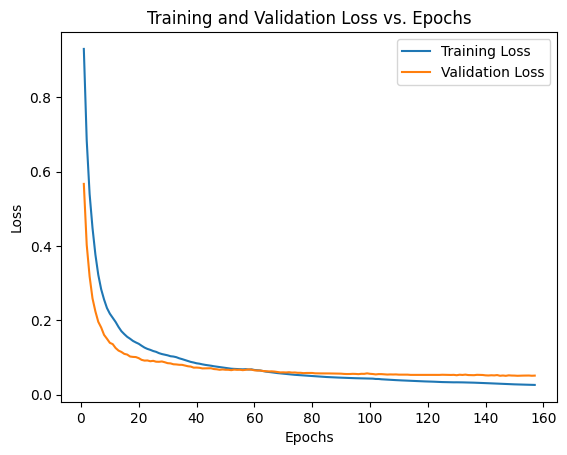

In [219]:
epoch = 512
batch_sizes = 16
early_stopping = EarlyStopping(
    monitor='val_loss',  # You can also use 'val_accuracy'
    patience=10,  # Number of epochs to wait after the last time validation loss improved
    restore_best_weights=True  # Restores model weights from the epoch with the best validation loss
)

history = autoencoder.fit(y_train, y_train, epochs=epoch, batch_size=batch_sizes, validation_data=(y_test, y_test), callbacks=[early_stopping])

# Extract the training loss values
training_loss = history.history['loss']

# Extract the validation loss values (if available)
validation_loss = history.history['val_loss']

# Create an array of epoch numbers (or steps)
epochs = range(1, len(training_loss) + 1)

# Plot the training and validation loss vs. epochs
plt.plot(epochs, training_loss, label='Training Loss')
if validation_loss:
    plt.plot(epochs, validation_loss, label='Validation Loss')

plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss vs. Epochs')
plt.legend()
plt.show()

#loss = CenterFrequency.evaluate(x1_test,y1_test, verbose=1)
#print('Test set\n  Loss: {:0.3f}'.format(loss))

In [220]:

# Assuming model is your trained Keras model and x_data, y_data are your input features and target values
y_pred = autoencoder.predict(y_data_scaled)

# Calculate Mean Squared Error
mse = mean_squared_error(y_data_scaled, y_pred)
print(f"Mean Squared Error: {mse}")
print("r2_score: ", r2_score(y_data_scaled,y_pred,  multioutput='uniform_average'))


19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
Mean Squared Error: 0.03091194660755702
r2_score:  0.9677037204431581


# Save model

In [221]:
# autoencoder.save_weights('autoencoder3_weights.weights.h5')
# autoencoder.save('autoencoder3.keras')

# Load model

In [89]:
autoencoder = create_model2()  # Recreate the model architecture
autoencoder.load_weights('autoencoder3_weights.weights.h5')

C:\Users\msalmaniaran\AppData\Local\anaconda3\envs\RL-Oct2024\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
C:\Users\msalmaniaran\AppData\Local\anaconda3\envs\RL-Oct2024\Lib\site-packages\keras\src\saving\saving_lib.py:719: UserWarning: Skipping variable loading for optimizer 'SGD', because it has 2 variables whereas the saved optimizer has 22 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


# Encoder with Attention layers

In [182]:
# dim = y_data.shape[1]
# input_dimension = len(ys_data[0:dim])
# # ys_data=ys_data.tolist()
# output_dimension = len(ys_data[0:dim])
# def create_model3(units=units, activation=activation):

#     # Define the input
#     input_layer = Input(shape=(dim,), name='input')

#     # Encoder
#     encoder = Dense(units, activation=activation, name='0')(input_layer)
#     encoder = Dense(units // 2, activation=activation, name='1')(encoder)
#     encoder = Dense(units // 4, activation=activation, name='2')(encoder)
#     encoder = Dense(units // 8, activation=activation, name='3')(encoder)
    
#     # Attention layer in the encoder
#     query_enc = Dense(units // 32, activation='relu', name='query_enc')(encoder)
#     key_enc = Dense(units // 32, activation='relu', name='key_enc')(encoder)
#     value_enc = Dense(units // 32, activation='relu', name='value_enc')(encoder)
#     attention_enc = Attention(name='attention_enc')([query_enc, value_enc, key_enc])
#     encoder_output = Concatenate(name='encoder_output')([encoder, attention_enc])
    
#     model = Model(inputs=input_layer, outputs=encoder_output, name='encoder')

#     optimizer = SGD(learning_rate=learning_rate, momentum=momentum)
#     model.compile(optimizer=optimizer, loss=loss)
#     return model

# encoder = create_model3()
# encoder.summary()



# for layer in autoencoder.layers:
#     if isinstance(layer, Dense):
#         try:
#             # Only set weights if the layer exists in the new model
#             new_layer = encoder.get_layer(name=layer.name)
#             weights = layer.get_weights()
#             new_layer.set_weights(weights)
#         except ValueError:
#             # Skip layers that do not have corresponding layers in the new model
#             print(f"Skipping weight transfer for layer: {layer.name}")

# optimizer = SGD(learning_rate = learning_rate, momentum=momentum)
# encoder.compile(optimizer=optimizer, loss=loss)

# predictions = encoder.predict(y_data)
# predictions.shape


# Encoder without Attention layers

In [222]:
dim = y_data.shape[1]
input_dimension = len(ys_data[0:dim])
# ys_data=ys_data.tolist()
output_dimension = len(ys_data[0:dim])
def create_model3(units=units, activation=activation):

    model = Sequential()

    model.add(Dense(units, input_dim=dim, activation=activation, name = '0'))  # Adjust input_dim to match number of features
    model.add(Dense(units//2, activation=activation, name = '1'))
    model.add(Dense(units//4, activation=activation, name = '2'))
    model.add(Dense(units//8, activation=activation, name = '3'))
    model.add(Dense(units//16, activation=activation, name = '4'))
    optimizer = SGD(learning_rate=learning_rate, momentum=momentum)
    model.compile(optimizer=optimizer, loss=loss)
    return model

encoder = create_model3()
encoder.summary()



for layer in autoencoder.layers:
    if isinstance(layer, Dense):
        try:
            # Only set weights if the layer exists in the new model
            new_layer = encoder.get_layer(name=layer.name)
            weights = layer.get_weights()
            new_layer.set_weights(weights)
        except ValueError:
            # Skip layers that do not have corresponding layers in the new model
            print(f"Skipping weight transfer for layer: {layer.name}")

optimizer = SGD(learning_rate = learning_rate, momentum=momentum)
encoder.compile(optimizer=optimizer, loss=loss)

predictions = encoder.predict(y_data)
predictions.shape


C:\Users\msalmaniaran\AppData\Local\anaconda3\envs\RL_Test\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_14"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ 0 (Dense)                            │ (None, 512)                 │          67,072 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ 1 (Dense)                            │ (None, 256)                 │         131,328 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ 2 (Dense)                            │ (None, 128)                 │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ 3 (Dense)                            │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ 4 (Dense)                            │ (None, 32)                  │           2,080 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 241,632 (943.88 KB)

 Trainable params: 241,632 (943.88 KB)

 Non-trainable params: 0 (0.00 B)

Skipping weight transfer for layer: 5
Skipping weight transfer for layer: 6
Skipping weight transfer for layer: 7
Skipping weight transfer for layer: 8
Skipping weight transfer for layer: 9
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step


(581, 32)

In [223]:
TF_pred = encoder.predict(y_data_scaled)

19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


In [224]:
df_TF = pd.DataFrame(TF_pred)
df_TF_x= pd.concat([df_x, df_TF], axis=1)
# df_TF_x

In [225]:
x_train, x_test, TF_pred_train, TF_pred_test = train_test_split(x_data, TF_pred, test_size=0.15, random_state=10)
scaler_x = StandardScaler()
scaler_x.fit(x_train)
x_train = scaler_x.transform(x_train)
x_test = scaler_x.transform(x_test)
x_data_scaled = scaler_x.transform(x_data)


# scaler_TF = MinMaxScaler()
# scaler_TF.fit(TF_pred_train)
# TF_pred_train_scaled = scaler_TF.transform(TF_pred_train)
# TF_pred_test_scaled = scaler_TF.transform(TF_pred_test)
# TF_pred_scaled = scaler_TF.transform(TF_pred)

In [263]:
dump(scaler_x, 'scaler_x3.bin', compress=True)

['scaler_x3.bin']

# ANN model

In [227]:
Variable_dim = len(df_x.columns)
def create_model5(unit=128, activation=activation):
    
    model = Sequential()
    model.add(Dense(unit, input_dim=Variable_dim, activation=activation))  # Adjust input_dim to match number of features
    # model.add(Dense(unit, activation=activation))
    model.add(Dense(unit, activation=activation))
    model.add(Dense(unit*2, activation=activation))
    model.add(Dense(unit, activation=activation))
    model.add(Dense(encoder.output_shape[1],activation=activation))  # Output layer should match the number of features
    optimizer = SGD(learning_rate=learning_rate, momentum=momentum)
    model.compile(optimizer=optimizer, loss=loss)
    return model

ANN_model = create_model5()
ANN_model.summary()




C:\Users\msalmaniaran\AppData\Local\anaconda3\envs\RL_Test\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_15"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_15 (Dense)                     │ (None, 128)                 │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_16 (Dense)                     │ (None, 128)                 │          16,512 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_17 (Dense)                     │ (None, 256)                 │          33,024 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_18 (Dense)                     │ (None, 128)                 │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_19 (Dense)                     │ (None, 32)                  │           4,128 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 88,352 (345.12 KB)

 Trainable params: 88,352 (345.12 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/500
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0208 - val_loss: 0.0260
Epoch 2/500
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0208 - val_loss: 0.0260
Epoch 3/500
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0208 - val_loss: 0.0260
Epoch 4/500
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0208 - val_loss: 0.0260
Epoch 5/500
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.0208 - val_loss: 0.0260
Epoch 6/500
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0207 - val_loss: 0.0260
Epoch 7/500
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0207 - val_loss: 0.0260
Epoch 8/500
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0207 - val_loss: 0.0260
Epoch 9/500
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0207 - val_loss: 0.0260
Epoch 10/500
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0207 - val_loss: 0.0260
Epoch 11/500
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0207 - val_loss: 0.0260
Epoch 12/500
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0207 - val_lo

Epoch 70/500
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 0.0205 - val_loss: 0.0260
Epoch 71/500
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0205 - val_loss: 0.0260
Epoch 72/500
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0205 - val_loss: 0.0260
Epoch 73/500
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0205 - val_loss: 0.0260
Epoch 74/500
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0205 - val_loss: 0.0260
Epoch 75/500
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0205 - val_loss: 0.0260
Epoch 76/500
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 0.0205 - val_loss: 0.0260
Epoch 77/500
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0205 - val_loss: 0.0260
Epoch 78/500
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0205 - val_loss: 0.0260
Epoch 79/500
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0205 - val_loss: 0.0260
Epoch 80/500
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0205 - val_loss: 0.0260
Epoch 81/500
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0205

8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0202 - val_loss: 0.0259
Epoch 139/500
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.0202 - val_loss: 0.0259
Epoch 140/500
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0202 - val_loss: 0.0259
Epoch 141/500
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0202 - val_loss: 0.0259
Epoch 142/500
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0202 - val_loss: 0.0259
Epoch 143/500
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0202 - val_loss: 0.0259
Epoch 144/500
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0202 - val_loss: 0.0259
Epoch 145/500
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0202 - val_loss: 0.0259
Epoch 146/500
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0202 - val_loss: 0.0259
Epoch 147/500
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0202 - val_loss: 0.0259
Epoch 148/500
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0202 - val_loss: 0.0259
Epoch 149/500
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0202 -

8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0200 - val_loss: 0.0259
Epoch 207/500
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0200 - val_loss: 0.0259
Epoch 208/500
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0200 - val_loss: 0.0259
Epoch 209/500
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0200 - val_loss: 0.0259
Epoch 210/500
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0200 - val_loss: 0.0259
Epoch 211/500
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0200 - val_loss: 0.0259
Epoch 212/500
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0200 - val_loss: 0.0259
Epoch 213/500
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0200 - val_loss: 0.0259
Epoch 214/500
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0200 - val_loss: 0.0259
Epoch 215/500
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0200 - val_loss: 0.0259
Epoch 216/500
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0200 - val_loss: 0.0259
Epoch 217/500
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0200 -

8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0198 - val_loss: 0.0258
Epoch 275/500
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0198 - val_loss: 0.0258
Epoch 276/500
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.0198 - val_loss: 0.0258
Epoch 277/500
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0198 - val_loss: 0.0258
Epoch 278/500
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0198 - val_loss: 0.0258
Epoch 279/500
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0197 - val_loss: 0.0258
Epoch 280/500
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0197 - val_loss: 0.0258
Epoch 281/500
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0197 - val_loss: 0.0258
Epoch 282/500
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0197 - val_loss: 0.0258
Epoch 283/500
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0197 - val_loss: 0.0258
Epoch 284/500
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0197 - val_loss: 0.0258
Epoch 285/500
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0197 -

8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0195 - val_loss: 0.0258
Epoch 343/500
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0195 - val_loss: 0.0258
Epoch 344/500
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0195 - val_loss: 0.0258
Epoch 345/500
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0195 - val_loss: 0.0258
Epoch 346/500
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0195 - val_loss: 0.0258
Epoch 347/500
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0195 - val_loss: 0.0258
Epoch 348/500
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0195 - val_loss: 0.0258
Epoch 349/500
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0195 - val_loss: 0.0258
Epoch 350/500
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0195 - val_loss: 0.0258
Epoch 351/500
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0195 - val_loss: 0.0258
Epoch 352/500
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0195 - val_loss: 0.0258
Epoch 353/500
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0195 -

8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0193 - val_loss: 0.0258
Epoch 411/500
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0193 - val_loss: 0.0258
Epoch 412/500
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0193 - val_loss: 0.0257
Epoch 413/500
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0193 - val_loss: 0.0257
Epoch 414/500
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0193 - val_loss: 0.0257
Epoch 415/500
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0193 - val_loss: 0.0257
Epoch 416/500
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0193 - val_loss: 0.0257
Epoch 417/500
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0193 - val_loss: 0.0257
Epoch 418/500
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0193 - val_loss: 0.0257
Epoch 419/500
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0193 - val_loss: 0.0257
Epoch 420/500
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0193 - val_loss: 0.0257
Epoch 421/500
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0193 -

8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0191 - val_loss: 0.0257
Epoch 479/500
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0191 - val_loss: 0.0257
Epoch 480/500
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0191 - val_loss: 0.0257
Epoch 481/500
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0191 - val_loss: 0.0257
Epoch 482/500
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0191 - val_loss: 0.0257
Epoch 483/500
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0191 - val_loss: 0.0257
Epoch 484/500
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0191 - val_loss: 0.0257
Epoch 485/500
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0191 - val_loss: 0.0257
Epoch 486/500
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0191 - val_loss: 0.0257
Epoch 487/500
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0191 - val_loss: 0.0257
Epoch 488/500
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0191 - val_loss: 0.0257
Epoch 489/500
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0191 -

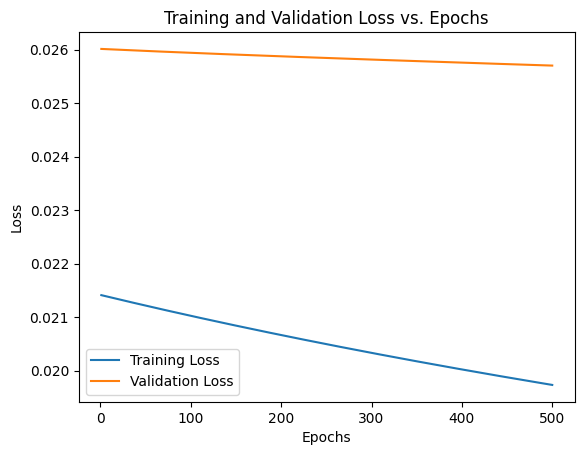

In [236]:
epoch = 500
batch_sizes = 64
early_stopping = EarlyStopping(
    monitor='val_loss',  # You can also use 'val_accuracy'
    patience=20,  # Number of epochs to wait after the last time validation loss improved
    restore_best_weights=True  # Restores model weights from the epoch with the best validation loss
)


history = ANN_model.fit(x_train, TF_pred_train, epochs=epoch, batch_size=batch_sizes, validation_data=(x_test, TF_pred_test), callbacks=[early_stopping])

# Extract the training loss values
training_loss = history.history['loss']

# Extract the validation loss values (if available)
validation_loss = history.history['val_loss']

# Create an array of epoch numbers (or steps)
epochs = range(1, len(training_loss) + 1)

# Plot the training and validation loss vs. epochs
plt.plot(epochs, training_loss, label='Training Loss')
if validation_loss:
    plt.plot(epochs, validation_loss, label='Validation Loss')

plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss vs. Epochs')
plt.legend()
plt.show()

#print('Test set\n  Loss: {:0.3f}'.format(loss))

In [242]:
ANN_pred = ANN_model.predict(x_data_scaled)
print("r2_score: ", r2_score(TF_pred, ANN_pred,  multioutput='uniform_average'))

19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
r2_score:  0.895670708284729


# Save model

In [243]:
# ANN_model.save_weights('ANN3_weights.weights.h5')
# ANN_model.save('ANN3.keras')

# Load model

In [53]:
# ANN_model = create_model5()  # Recreate the model architecture
# ANN_model.load_weights('ANN3_weights.weights.h5')
# # ANN_model = load_model('ANN2.keras')

# Decoder with attention layer

In [123]:
# dim = y_data.shape[1]
# input_dimension = len(ys_data[0:dim])
# # ys_data=ys_data.tolist()
# output_dimension = len(ys_data[0:dim])
# def create_model4(units=units, activation=activation):
    
#     input_layer = Input(shape=(encoder.output_shape[1],), name='input')

# # Decoder
#     decoder = Dense(units // 16, activation=activation, name='0')(input_layer)
#     decoder = Dense(units // 8, activation=activation, name='1')(decoder)
#     decoder = Dense(units // 4, activation=activation, name='2')(decoder)
#     decoder = Dense(units // 2, activation=activation, name='3')(decoder)
#     decoder = Dense(units, activation=activation, name='decoder_4')(decoder)

#     # Attention layer in the decoder
#     query_dec = Dense(units // 32, activation='relu', name='query_dec')(decoder)
#     key_dec = Dense(units // 32, activation='relu', name='key_dec')(decoder)
#     value_dec = Dense(units // 32, activation='relu', name='value_dec')(decoder)
#     attention_dec = Attention(name='attention_dec')([query_dec, value_dec, key_dec])
#     decoder_output = Concatenate(name='decoder_output')([decoder, attention_dec])

#     # Output layer
#     output_layer = Dense(dim, name='output')(decoder_output)

#     # Define the model
#     model = Model(inputs=input_layer, outputs=output_layer, name='decoder')
#     # Compile the model
#     optimizer = SGD(learning_rate=learning_rate, momentum=momentum)
#     model.compile(optimizer=optimizer, loss=loss)
    
#     return model

# decoder = create_model4()
# decoder.summary()



# for layer in autoencoder.layers:
#     if isinstance(layer, Dense):
#         try:
#             # Only set weights if the layer exists in the new model
#             new_layer = decoder.get_layer(name=layer.name)
#             weights = layer.get_weights()
#             new_layer.set_weights(weights)
#         except ValueError:
#             # Skip layers that do not have corresponding layers in the new model
#             print(f"Skipping weight transfer for layer: {layer.name}")

# optimizer = SGD(learning_rate=learning_rate, momentum=momentum)
# decoder.compile(optimizer=optimizer, loss=loss)

# # predictions = decoder.predict(y_data)
# # predictions.shape


# Decoder

In [244]:
dim = y_data.shape[1]
input_dimension = len(ys_data[0:dim])
# ys_data=ys_data.tolist()
output_dimension = len(ys_data[0:dim])
def create_model4(units=units, activation=activation):

    model = Sequential()

    model.add(Dense(units//8, input_dim=int(units/16), activation=activation, name = '5'))  # Adjust input_dim to match number of features
    model.add(Dense(units//4, activation=activation, name = '6'))
    model.add(Dense(units//2, activation=activation, name = '7'))
    model.add(Dense(units, activation=activation, name = '8'))
    model.add(Dense(dim, name = '9'))  # Output layer should match the number of features
    optimizer = SGD(learning_rate=learning_rate, momentum=momentum)
    model.compile(optimizer=optimizer, loss=loss)
    return model

decoder = create_model4()
decoder.summary()



for layer in autoencoder.layers:
    if isinstance(layer, Dense):
        try:
            # Only set weights if the layer exists in the new model
            new_layer = decoder.get_layer(name=layer.name)
            weights = layer.get_weights()
            new_layer.set_weights(weights)
        except ValueError:
            # Skip layers that do not have corresponding layers in the new model
            print(f"Skipping weight transfer for layer: {layer.name}")

optimizer = SGD(learning_rate=learning_rate, momentum=momentum)
decoder.compile(optimizer=optimizer, loss=loss)

# predictions = decoder.predict(y_data)
# predictions.shape


C:\Users\msalmaniaran\AppData\Local\anaconda3\envs\RL_Test\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_17"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ 5 (Dense)                            │ (None, 64)                  │           2,112 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ 6 (Dense)                            │ (None, 128)                 │           8,320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ 7 (Dense)                            │ (None, 256)                 │          33,024 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ 8 (Dense)                            │ (None, 512)                 │         131,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ 9 (Dense)                            │ (None, 130)                 │          66,690 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 241,730 (944.26 KB)

 Trainable params: 241,730 (944.26 KB)

 Non-trainable params: 0 (0.00 B)

Skipping weight transfer for layer: 0
Skipping weight transfer for layer: 1
Skipping weight transfer for layer: 2
Skipping weight transfer for layer: 3
Skipping weight transfer for layer: 4


In [245]:
decoder.input_shape

(None, 32)

# ANN + Decoder Model

In [248]:
combined_output = decoder(ANN_model.outputs)

# Define the new cascaded model
ANN_decoder = Model(inputs=ANN_model.inputs, outputs=combined_output)

# Compile the new model
optimizer = SGD(learning_rate=learning_rate, momentum=momentum)
ANN_decoder.compile(optimizer=optimizer, loss=loss)
ANN_decoder.save('ANN_decoder3.keras')
ANN_decoder.summary()

Model: "functional_115"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_15 (InputLayer)          │ (None, 13)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_15 (Dense)                     │ (None, 128)                 │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_16 (Dense)                     │ (None, 128)                 │          16,512 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_17 (Dense)                     │ (None, 256)                 │          33,024 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_18 (Dense)                     │ (None, 128)                 │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_19 (Dense)                     │ (None, 32)                  │           4,128 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ sequential_17 (Sequential)           │ (None, 130)                 │         241,730 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 330,082 (1.26 MB)

 Trainable params: 330,082 (1.26 MB)

 Non-trainable params: 0 (0.00 B)

In [249]:
# Get the output of the cascaded model
output = ANN_decoder.predict(x_data_scaled)
s11_reconstructed = scaler_y.inverse_transform(output)
# print(s11_reconstructed)
print("r2_score: ", r2_score(y_data,s11_reconstructed,multioutput='uniform_average'))

 1/19 ━━━━━━━━━━━━━━━━━━━━ 1s 102ms/step

C:\Users\msalmaniaran\AppData\Local\anaconda3\envs\RL_Test\lib\site-packages\keras\src\models\functional.py:238: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: ['keras_tensor_403']
Received: inputs=Tensor(shape=(32, 13))
  warnings.warn(msg)
C:\Users\msalmaniaran\AppData\Local\anaconda3\envs\RL_Test\lib\site-packages\keras\src\models\functional.py:238: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: keras_tensor_436
Received: inputs=['Tensor(shape=(32, 32))']
  warnings.warn(msg)
C:\Users\msalmaniaran\AppData\Local\anaconda3\envs\RL_Test\lib\site-packages\keras\src\models\functional.py:238: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: ['keras_tensor_403']
Received: inputs=Tensor(shape=(None, 13))
  warnings.warn(msg)
C:\Users\msalmaniaran\AppData\Local\anaconda3\envs\RL_Test\lib\site-packages\keras\src\models\functional.py:238: UserWarning: The structure of `inputs` 

19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
r2_score:  0.8994528184777857


In [250]:
x_data_scaled[40]

array([0.25004158, 0.30983594, 0.27308099, 0.16302732, 0.31111143,
       0.1508793 , 0.19144089, 0.36375844, 2.20811988, 0.39540489,
       0.28575098, 0.16326353, 0.15067753])

sample number:  139
0.9790420834001149
0.9781836207001633


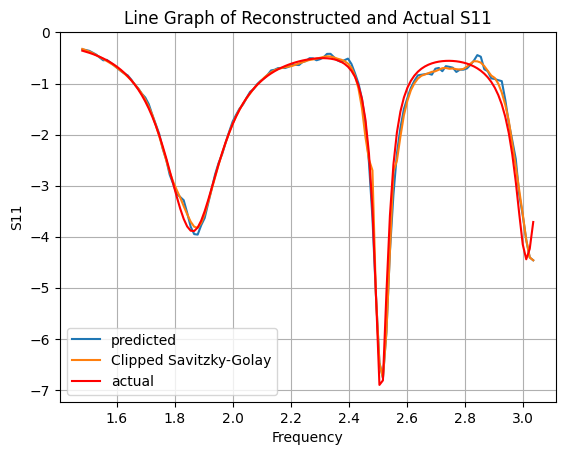

In [259]:
from scipy.signal import savgol_filter
i = random.randint(0,len(x_data)-1)
# i = 477
print("sample number: ", i)
threshold = -4  # Define the threshold
window_length = 5
polyorder = 1
data = s11_reconstructed[i]
y_smooth = np.copy(data)
indices_above_threshold = np.where(data > threshold)[0]
if len(indices_above_threshold) > window_length:  # Ensure there are enough points to apply the filter
    y_smooth[indices_above_threshold] = savgol_filter(data[indices_above_threshold], window_length=window_length, polyorder=polyorder)



# print(data)

# y_smooth = savgol_filter(s11_reconstructed[i], window_length=7, polyorder=2)
# y_smooth2 = gaussian_filter1d(s11_reconstructed[i], sigma=1)

# Y = fft(s11_reconstructed[i])
# cutoff = 1300
# Y[cutoff:] = 0
# y_smooth3 = np.real(ifft(Y))


print(r2_score(y_data[i],s11_reconstructed[i],  multioutput='uniform_average'))
print(r2_score(y_data[i],y_smooth,  multioutput='uniform_average'))

clipped_data = [min(x, 0) for x in y_smooth]

plt.plot(freq, s11_reconstructed[i], label = 'predicted')
plt.plot(freq, clipped_data, label = 'Clipped Savitzky-Golay')
# plt.plot(freq, y_smooth2, label = 'Gaussian Filter')
# plt.plot(freq, y_smooth3, label = 'FFT')
plt.plot(freq, y_data[i], 'r', label = 'actual')

# Adding labels, title, and legend
plt.xlabel('Frequency')
plt.ylabel('S11')
plt.title('Line Graph of Reconstructed and Actual S11')
plt.legend()  # Show legend
plt.grid(True)
plt.show()

In [260]:
s11_smoothed=[]
for i in range(len(s11_reconstructed)):
    data = s11_reconstructed[i]
    y_smooth = np.copy(data)
    indices_above_threshold = np.where(data > threshold)[0]
    if len(indices_above_threshold) > window_length:  # Ensure there are enough points to apply the filter
        y_smooth[indices_above_threshold] = savgol_filter(data[indices_above_threshold], window_length=window_length, polyorder=polyorder)
    s11_smoothed.append(y_smooth)

In [261]:
print("r2_score: ", r2_score(y_data,s11_smoothed,multioutput='uniform_average'))

r2_score:  0.8993530425820557


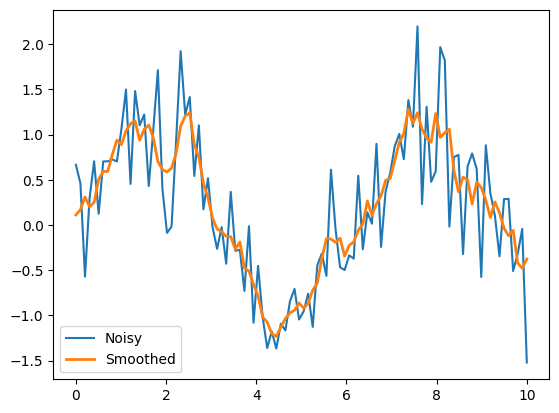

In [63]:
import numpy as np
import matplotlib.pyplot as plt

# Create sample noisy data
x = np.linspace(0, 10, 100)
y = np.sin(x) + np.random.normal(0, 0.5, x.shape)

# Apply moving average
window_size = 5
y_smooth = np.convolve(y, np.ones(window_size)/window_size, mode='same')

plt.plot(x, y, label='Noisy')
plt.plot(x, y_smooth, label='Smoothed', linewidth=2)
plt.legend()
plt.show()


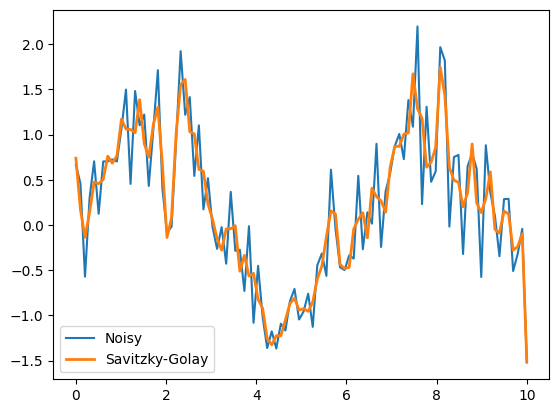

In [66]:
from scipy.signal import savgol_filter

# Apply Savitzky-Golay filter
y_smooth = savgol_filter(y, window_length=5, polyorder=3)

plt.plot(x, y, label='Noisy')
plt.plot(x, y_smooth, label='Savitzky-Golay', linewidth=2)
plt.legend()
plt.show()


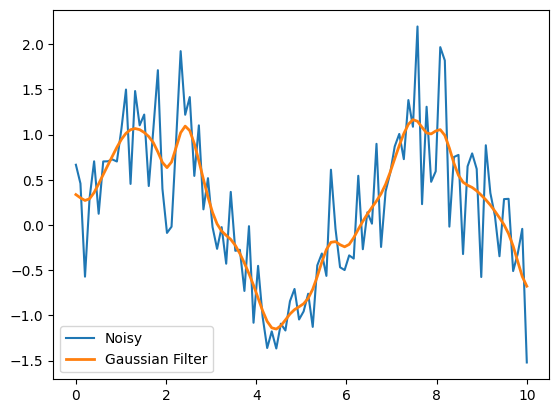

In [89]:
from scipy.ndimage import gaussian_filter1d

# Apply Gaussian filter
y_smooth = gaussian_filter1d(y, sigma=2)

plt.plot(x, y, label='Noisy')
plt.plot(x, y_smooth, label='Gaussian Filter', linewidth=2)
plt.legend()
plt.show()

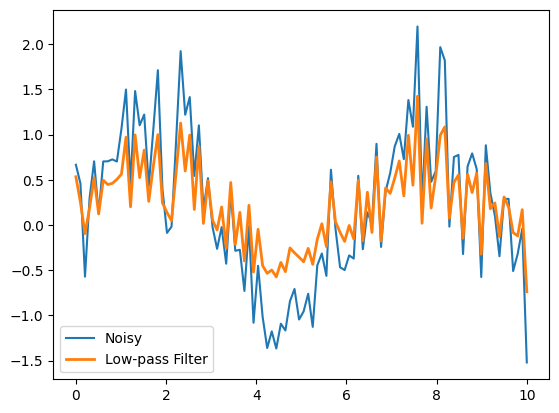

In [112]:
from scipy.fft import fft, ifft

# Perform Fourier transform
Y = fft(y)

# Zero out high frequency components
cutoff = 60
Y[cutoff:] = 0

# Inverse Fourier transform to get smoothed data
y_smooth = np.real(ifft(Y))

plt.plot(x, y, label='Noisy')
plt.plot(x, y_smooth, label='Low-pass Filter', linewidth=2)
plt.legend()
plt.show()


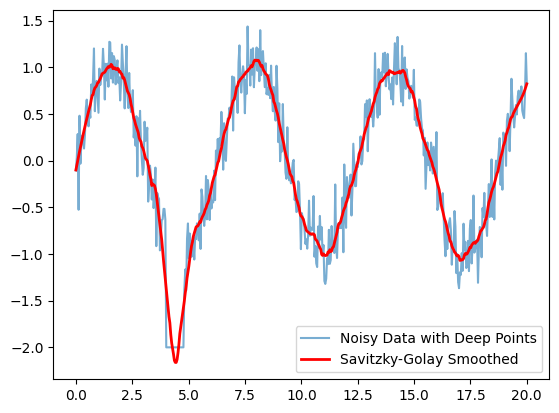

In [160]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import savgol_filter

# Create sample noisy data with deep points
x = np.linspace(0, 20, 500)
y = np.sin(x) + np.random.normal(0, 0.2, x.shape)
y[100:120] = -2  # Adding an artificial deep point

# Apply Savitzky-Golay filter
y_smooth = savgol_filter(y, window_length=31, polyorder=3)

plt.plot(x, y, label='Noisy Data with Deep Points', alpha=0.6)
plt.plot(x, y_smooth, label='Savitzky-Golay Smoothed', linewidth=2, color='red')
plt.legend()
plt.show()


In [204]:
j = 0
highQ_index = []
index_lowR2 = []
for i in range(len(y_data)):
    r2 = r2_score(y_data[i],s11_reconstructed[i],  multioutput='uniform_average')
    if r2<=0.5:
        highQ_index.append(i)
        index_lowR2.append(i)
        j+=1
print(j)
print(index_lowR2)

59
[17, 83, 121, 133, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 365, 369, 370, 371, 372, 373, 374, 394, 440, 450, 451, 452, 453, 454, 455, 456, 457, 458, 459, 460, 461, 462, 463, 464, 465, 466, 467, 468, 469, 470, 471, 472, 473, 474, 475, 476, 477, 478, 479, 483, 484, 492, 551]


In [145]:
# highQ_index

In [823]:
input_dimension = len(x_data[0])
# ys_data=ys_data.tolist()
output_dimension = len(ys_data[0:250])
def create_model(units=64, activation='relu'):
    # Define the input layer
    input_layer = Input(shape=(input_dimension,))

    # Define the shared hidden layers
    hidden_layer = Dense(units, activation=activation)(input_layer)
    # hidden_layer = Dense(units, activation=activation)(input_layer)
    hidden_layer = Dense(2*units, activation=activation)(hidden_layer)
    # hidden_layer = Dense(3*units, activation=activation)(hidden_layer)
    # hidden_layer = Dense(units, activation=activation)(hidden_layer)

    # Define the first output layer
    output = Dense(output_dimension, activation='linear')(hidden_layer)

    # Create the model with multiple outputs
    model = Model(inputs=input_layer, outputs=output)


    optimizer = SGD(learning_rate=0.01, momentum=0.9)
    model.compile(optimizer=optimizer, loss='mean_absolute_error')
    return model

simulation = create_model()
simulation.summary()
print('x_data dimension: ',x_data.size)
print('y_data dimension: ',y_data.size)
print('x1_train dimension: ',x_train.size)
print('y_train dimension: ',y_train.size)
print('x1_test dimension: ',x_test.size)
print('y_test dimension: ',y_test.size)

Model: "model_29"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_33 (InputLayer)       [(None, 16)]              0         
                                                                 
 dense_122 (Dense)           (None, 64)                1088      
                                                                 
 dense_123 (Dense)           (None, 128)               8320      
                                                                 
 dense_124 (Dense)           (None, 250)               32250     
                                                                 
Total params: 41,658
Trainable params: 41,658
Non-trainable params: 0
_________________________________________________________________
x_data dimension:  10128
y_data dimension:  158250
x1_train dimension:  31520
y_train dimension:  492500
x1_test dimension:  7888
y_test dimension:  123250


In [824]:
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.2, random_state=20)
scaler_x = MinMaxScaler()
scaler_x.fit(x_train)
x_train = scaler_x.transform(x_train)
x_test = scaler_x.transform(x_test)

x_data_scaled = scaler_x.transform(x_data)


scaler_y = MinMaxScaler()
scaler_y.fit(y_train)
y_train = scaler_y.transform(y_train)
y_test = scaler_y.transform(y_test)
y_data_scaled = scaler_y.transform(y_data)
print(x_test)

[[0.1875     0.41766667 0.91       ... 0.53111111 0.         0.        ]
 [0.4575     0.41766667 0.91       ... 0.53111111 0.         0.        ]
 [0.4575     0.41766667 0.91       ... 0.53111111 0.         0.        ]
 ...
 [0.4575     0.41766667 0.91       ... 0.53111111 0.         0.        ]
 [0.4575     0.41766667 0.91       ... 0.53111111 0.         0.        ]
 [0.4575     0.41766667 0.91       ... 0.53111111 0.         0.        ]]


In [2169]:
epoch = 128
batch_sizes = 128
history = simulation.fit(x_train, y_train, epochs=epoch, batch_size=batch_sizes, validation_data=(x_test, y_test))

# Extract the training loss values
training_loss = history.history['loss']

# Extract the validation loss values (if available)
validation_loss = history.history['val_loss']

# Create an array of epoch numbers (or steps)
epochs = range(1, len(training_loss) + 1)

# Plot the training and validation loss vs. epochs
plt.plot(epochs, training_loss, label='Training Loss')
if validation_loss:
    plt.plot(epochs, validation_loss, label='Validation Loss')

plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss vs. Epochs')
plt.legend()
plt.show()

#loss = CenterFrequency.evaluate(x1_test,y1_test, verbose=1)
#print('Test set\n  Loss: {:0.3f}'.format(loss))

ValueError: Data cardinality is ambiguous:
  x sizes: 540
  y sizes: 508
Make sure all arrays contain the same number of samples.

In [2170]:
# Assuming model is your trained Keras model and x_data, y_data are your input features and target values
y_pred = simulation.predict(x_data_scaled)

# Calculate Mean Squared Error
mse = mean_squared_error(y_data_scaled, y_pred)
print(f"Mean Squared Error: {mse}")

20/20 [==============================] - 0s 2ms/step


ValueError: y_true and y_pred have different number of output (170!=250)

In [1471]:
random_sample = random.randint(0, len(df_all))
# Getting predictions for the new data
new_data = x_data[random_sample].reshape(1, -1)
prediction = simulation.predict(scaler_x.transform(new_data))

prediction = scaler_y.inverse_transform(prediction)
# The 'predictions' variable will contain the predicted outputs for your new data
# print(prediction)

yf=np.squeeze(yf_data[:len(df_yst.columns)])
df_1 = pd.DataFrame(yf, columns=['Frequency'])
prediction=np.squeeze(prediction)
df_2 = pd.DataFrame(prediction, columns=['S11'])
y_actual = y_data[random_sample]
df_3 = pd.DataFrame(y_actual, columns=['Actual'])

df_pre_concat = pd.concat([df_1, df_2], axis=1)
# df_pre_concat.plot(x='Frequency', y='S11', kind='line')

df_pre_concat2 = pd.concat([df_1, df_3], axis=1)
# df_pre_concat.plot(x='Frequency', y='Actual', kind='line')


plt.plot(df_pre_concat['Frequency'], df_pre_concat['S11'], color='blue', label='Reconstructed S11')

# Plot the actual S11 in red
plt.plot(df_pre_concat2['Frequency'], df_pre_concat2['Actual'], color='red', label='Actual S11')

# Adding labels, title, and legend
plt.xlabel('Frequency')
plt.ylabel('S11')
plt.title('Line Graph of Reconstructed and Actual S11')
plt.legend()  # Show legend
plt.grid(True)
plt.show()

1/1 [==============================] - 0s 22ms/step


ValueError: operands could not be broadcast together with shapes (1,250) (170,) (1,250) 

In [808]:
# # Plotting
# plt.figure(figsize=(10, 6))

# # Plot the first line (S11)
# plt.plot(df_pre_concat['Frequency'], df_pre_concat['S11'], marker='o', linestyle='-', color='b', label='Predicted S11')

# # Plot the second line (Actual)
# plt.plot(df_pre_concat2['Frequency'], df_pre_concat2['Actual'], marker='x', linestyle='--', color='r', label='Actual S11')

# # Adding labels, title, and legend
# plt.xlabel('Frequency')
# plt.ylabel('S11')
# plt.title('Line Graph of Predicted and Actual S11')
# plt.legend()  # Show legend
# plt.grid(True)
# plt.show()